In [1]:
#clear all varaibles
%reset

In [2]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

In [4]:
d0_en = []
d0_ang = []

# opening the CSV file  
with open('d_0.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d0_en.append(float(lines[0]))
        d0_ang.append(float(lines[1]))

d2_en = []
d2_ang = []

# opening the CSV file  
with open('d_2.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d2_en.append(float(lines[0]))
        d2_ang.append(float(lines[1]))

d4_en = []
d4_ang = []

# opening the CSV file  
with open('d_4.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d4_en.append(float(lines[0]))
        d4_ang.append(float(lines[1]))

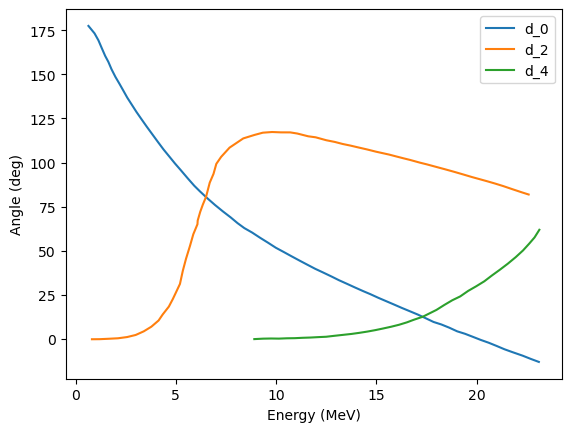

In [5]:
plt.Figure
plt.plot(d0_en, d0_ang, label="d_0")
plt.plot(d2_en, d2_ang, label="d_2")
plt.plot(d4_en, d4_ang, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (deg)")
plt.legend(loc='upper right')

In [6]:
# Convert everything to a numpy array
d0_ang = np.array(d0_ang)
d0_en = np.array(d0_en)
d2_ang = np.array(d2_ang)
d2_en = np.array(d2_en)
d4_ang = np.array(d4_ang)
d4_en = np.array(d4_en)

# Get rid of negative values in d2 and d4
# Now add zeros
number_zeros = 10

pos_d2 = d2_ang > 0
if ~np.all(pos_d2):
    d2_ang = d2_ang[pos_d2]
    d2_en = d2_en[pos_d2]
    if d2_en[0] != 0:
        d2_ang = np.concatenate((np.zeros(number_zeros), d2_ang))
        d2_en = np.concatenate((np.linspace(0, d2_en[0], number_zeros), d2_en))

pos_d4 = d4_ang > 0
if ~np.all(pos_d4):
    d4_ang = d4_ang[pos_d4]
    d4_en = d4_en[pos_d4]
    if d4_en[0] != 0:
        d4_ang = np.concatenate((np.zeros(number_zeros), d4_ang))
        d4_en = np.concatenate((np.linspace(0, d4_en[0], number_zeros), d4_en))

# Now get rid of any repeating energies. All should be unique.
# Remove duplicate energy values (x) while keeping matching delta_L (y)
d0_en, indices = np.unique(d0_en, return_index=True)
d0_ang = d0_ang[indices]

d2_en, indices = np.unique(d2_en, return_index=True)
d2_ang = d2_ang[indices]

d4_en, indices = np.unique(d4_en, return_index=True)
d4_ang = d4_ang[indices]

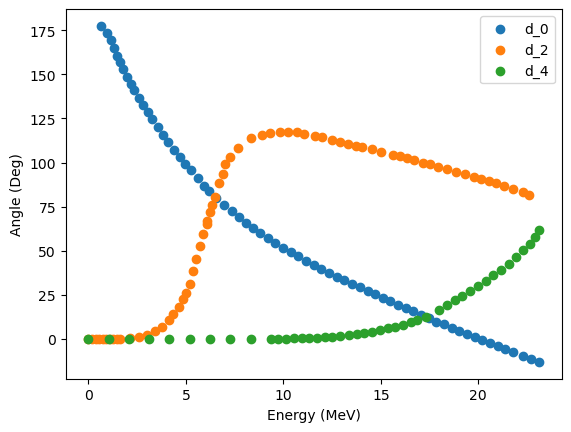

In [7]:
# Plot

plt.Figure
plt.scatter(d0_en, d0_ang, label="d_0")
plt.scatter(d2_en, d2_ang, label="d_2")
plt.scatter(d4_en, d4_ang, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (Deg)")
plt.legend(loc='upper right')

In [8]:
common_energy = np.linspace(0.1, 23, 75)

interp_l0 = interp1d(d0_en, d0_ang, kind='cubic', fill_value="extrapolate")
interp_l2 = interp1d(d2_en, d2_ang, kind='cubic', fill_value="extrapolate")
interp_l4 = interp1d(d4_en, d4_ang, kind='cubic', fill_value="extrapolate")

d_l0_interp = interp_l0(common_energy)
d_l2_interp = interp_l2(common_energy)
d_l4_interp = interp_l4(common_energy)

# Create the spline fit (s=0 means interpolate exactly)
#delta_spline_0 = UnivariateSpline(d0_en, d0_ang, s=2)
#delta_spline_2 = UnivariateSpline(d2_en, d2_ang, s=2)
#delta_spline_4 = UnivariateSpline(d4_en, d4_ang, s=2)

#delta_vals_0 = delta_spline_0(common_energy)
#delta_vals_2 = delta_spline_2(common_energy)
#delta_vals_4 = delta_spline_4(common_energy)

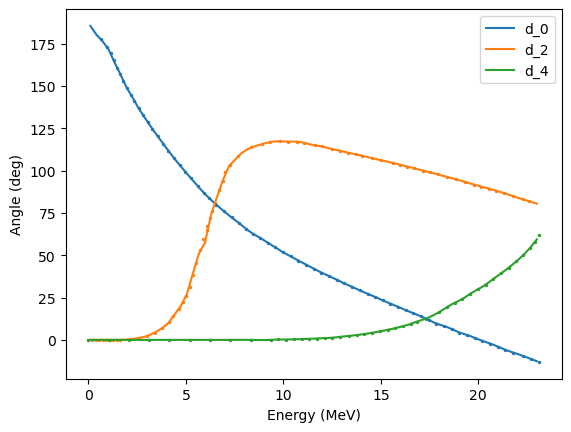

In [9]:
plt.Figure()
#plt.plot(common_energy, delta_vals_0, label="d_0")
#plt.plot(common_energy, delta_vals_2, label="d_2")
#plt.plot(common_energy, delta_vals_4, label="d_4")
plt.plot(common_energy, d_l0_interp, label="d_0")
plt.plot(common_energy, d_l2_interp, label="d_2")
plt.plot(common_energy, d_l4_interp, label="d_4")
plt.scatter(d0_en, d0_ang, s=2)
plt.scatter(d2_en, d2_ang, s=2)
plt.scatter(d4_en, d4_ang, s=2)
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (deg)")
plt.legend(loc='upper right')
#plt.xlim(0, 5)
#plt.ylim(-1, 5)

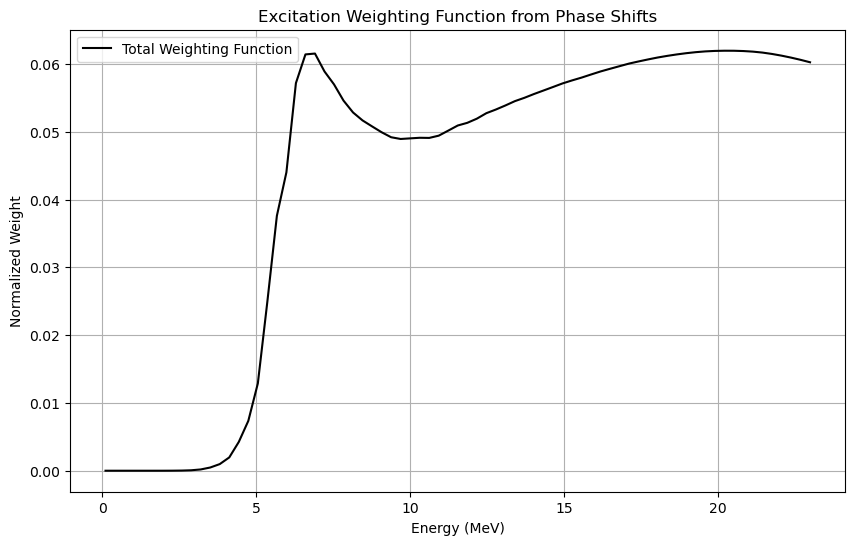

In [14]:
W0 = (2*0 + 1) * np.sin(np.radians(d_l0_interp))**2
W2 = (2*2 + 1) * np.sin(np.radians(d_l2_interp))**2
W4 = (2*4 + 1) * np.sin(np.radians(d_l4_interp))**2

W_total = W2 #W0 + W2 + W4

W_total /= np.trapz(W_total, common_energy)  # Normalize area under curve to 1


plt.figure(figsize=(10,6))
plt.plot(common_energy, W_total, label='Total Weighting Function', color='black')
#plt.plot(common_energy, W0, label=r'$L=0$', linestyle='--')
#plt.plot(common_energy, W2, label=r'$L=2$', linestyle='-.')
#plt.plot(common_energy, W4, label=r'$L=4$', linestyle=':')
plt.xlabel('Energy (MeV)')
plt.ylabel('Normalized Weight')
plt.title('Excitation Weighting Function from Phase Shifts')
plt.legend()
plt.grid(True)
#plt.yscale('log')
plt.show()

<>:89: SyntaxWarning: invalid escape sequence '\d'
<>:89: SyntaxWarning: invalid escape sequence '\d'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2745/1879702161.py:89: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')


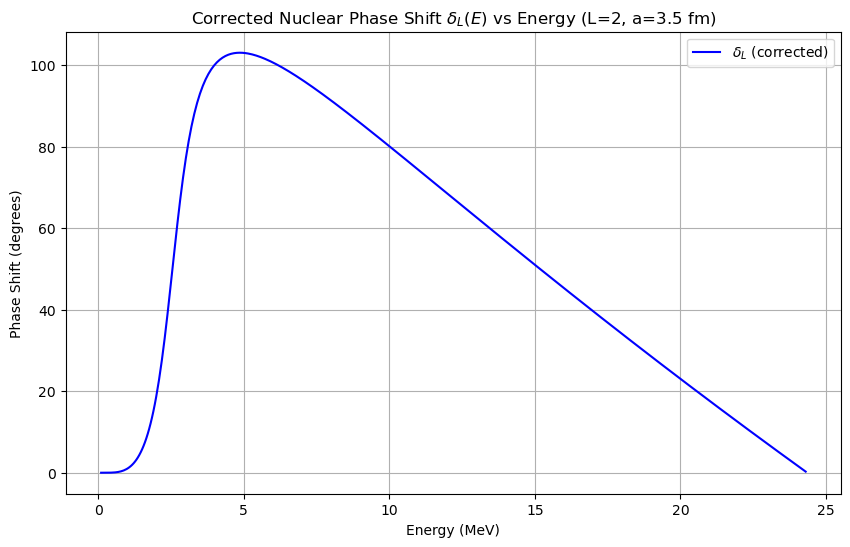

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set mpmath precision
mpmath.mp.dps = 15

# Constants
hbar_c = 197.327  # MeV·fm
e_squared = 1.4399764  # MeV·fm
Z_alpha = 2
Z_C12 = 4

m_alpha = 3727.379378  # MeV/c^2
m_C12 = 11177.929      # MeV/c^2 

mu_alpha_alpha = m_alpha / 2
mu_alpha_C12 = (m_alpha * m_C12) / (m_alpha + m_C12)

a_alpha_alpha = 3.5  # fm (channel radius)
a_alpha_C12 = 5.5 # fm
L_d = 2  # d-wave
L_f = 3 # f-wave

# Resonance parameters
E_r = 3.18  # MeV (resonance energy)
gamma2 = 3.36  # MeV (reduced width)

# Energy range
energies = np.linspace(0.1, 24.3, 500)

# Arrays to store
delta_Ld = []
phi_Ld = []
P_Ld_list = []
P_Lf_list = []

# Loop over energies
for E in energies:
    k_alpha_alpha = np.sqrt(2 * mu_alpha_alpha * E) / hbar_c
    eta_alpha_alpha = Z_alpha * Z_alpha * e_squared * mu_alpha_alpha / (hbar_c**2 * k_alpha_alpha)
    kr_alpha_alpha = k_alpha_alpha * a_alpha_alpha

    k_alpha_C12 = np.sqrt(2 * mu_alpha_C12 * E) / hbar_c
    eta_alpha_C12 = Z_alpha * Z_C12 * e_squared * mu_alpha_C12 / (hbar_c**2 * k_alpha_C12)
    kr_alpha_C12 = k_alpha_C12 * a_alpha_C12

    # Coulomb wavefunctions
    F_Ld = float(mpmath.coulombf(L_d, eta_alpha_alpha, kr_alpha_alpha, derivative=False))
    G_Ld = float(mpmath.coulombg(L_d, eta_alpha_alpha, kr_alpha_alpha, derivative=False))

    F_Lf = float(mpmath.coulombf(L_f, eta_alpha_C12, kr_alpha_C12, derivative=False))
    G_Lf = float(mpmath.coulombg(L_f, eta_alpha_C12, kr_alpha_C12, derivative=False))

    # Hard-sphere Coulomb phase shift Phi_L
    phi = np.arctan2(F_Ld, G_Ld)
    phi_Ld.append(phi)

    # Penetrability
    P_Ld = (kr_alpha_alpha) / (F_Ld**2 + G_Ld**2)
    P_Ld_list.append(P_Ld)

    P_Lf = (kr_alpha_C12) / (F_Lf**2 + G_Lf**2)
    P_Lf_list.append(P_Lf)

    # Width and shift correction
    Gamma_E = 2 * P_Ld * gamma2

    # Correct phase shift calculation with arctan2
    numerator = 0.5 * Gamma_E
    denominator = E_r - E
    delta = -phi + np.arctan2(numerator, denominator)
    delta_Ld.append(delta)

# Convert to arrays
delta_Ld = np.array(delta_Ld)
phi_Ld = np.array(phi_Ld)
P_Ld_array = np.array(P_Ld_list)
P_Lf_array = np.array(P_Lf_list)

# Convert phase shift to degrees
delta_L_deg = np.degrees(delta_Ld)

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(energies, delta_L_deg, label=r'$\delta_L$ (corrected)', color='blue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2745/3210597090.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$ (arb. units)')
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2745/3210597090.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Excitation Curve from $\delta_L(E)$ (L=2, a=3.5 fm)')


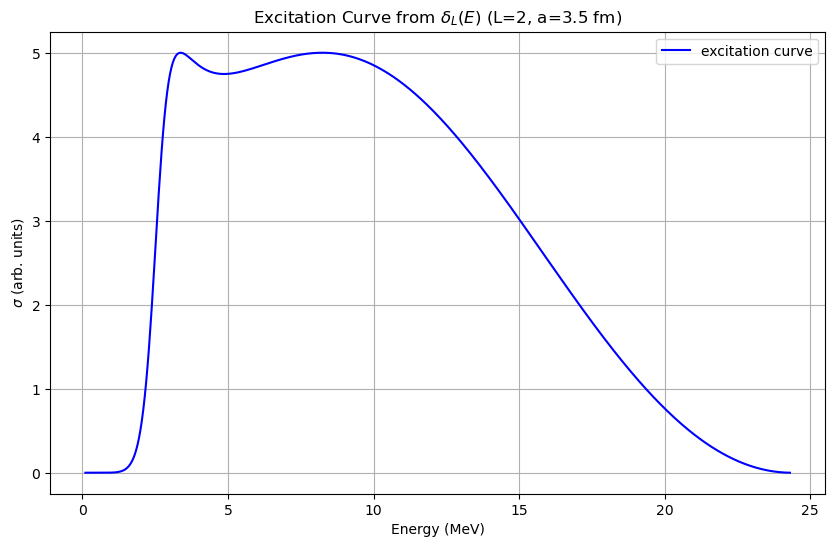

In [33]:
excitation_curve = (2 * L_d + 1) * np.sin(delta_Ld)**2

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(energies, excitation_curve, label='excitation curve', color='blue')
plt.xlabel('Energy (MeV)')
plt.ylabel('$\sigma$ (arb. units)')
plt.title('Excitation Curve from $\delta_L(E)$ (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2745/145823279.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$ (arb. units)')


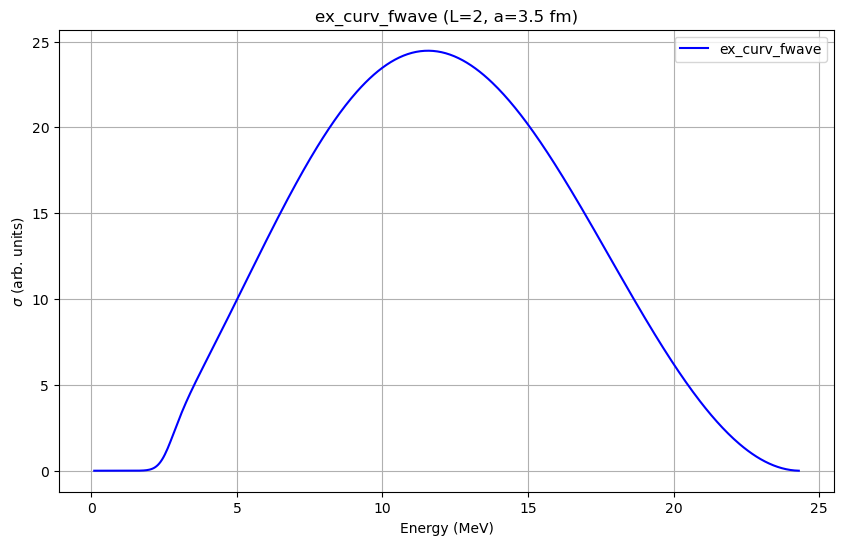

In [34]:
ex_curv_fwave = excitation_curve*P_Lf_array

# Convolute with 
plt.figure(figsize=(10, 6))
plt.plot(energies, ex_curv_fwave, label='ex_curv_fwave', color='blue')
plt.xlabel('Energy (MeV)')
plt.ylabel('$\sigma$ (arb. units)')
plt.title('ex_curv_fwave (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()

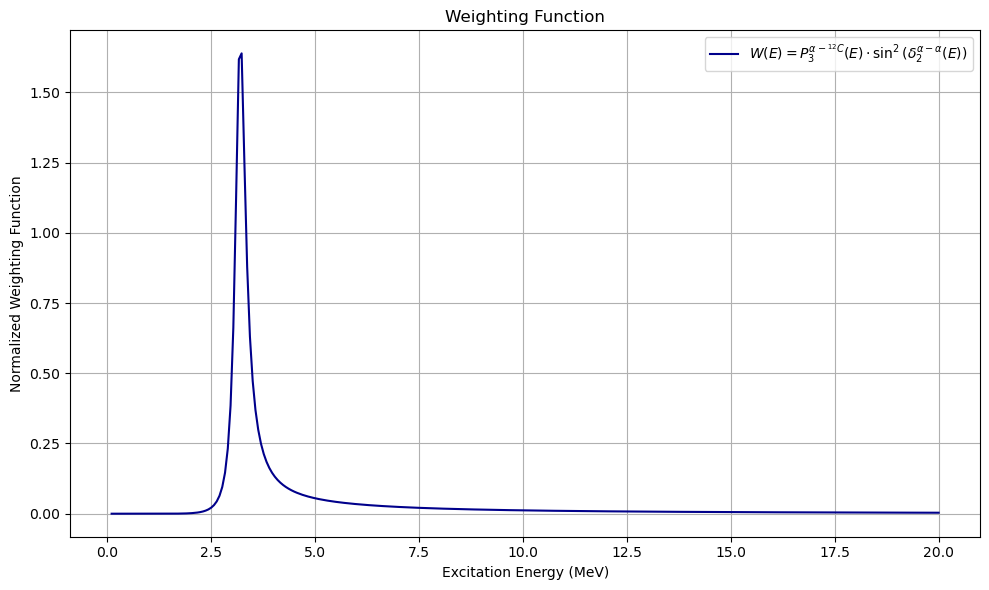

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import coulombf, coulombg, mp
from scipy.interpolate import UnivariateSpline

# Set mpmath precision
mp.dps = 15

# Constants
hbar_c = 197.327  # MeV·fm
e_squared = 1.4399764  # MeV·fm

# Particle properties for α–α phase shift (delta_2)
Z1_alpha = 2
Z2_alpha = 2
mu_alpha = (4 * 4) / (4 + 4) * 931.5  # Reduced mass in MeV/c^2 for alpha-alpha

# Particle properties for f-wave penetrability (α–12C)
Z1_c12 = 2
Z2_c12 = 6
mu_c12 = (4 * 12) / (4 + 12) * 931.5  # Reduced mass in MeV/c^2 for alpha-12C

# Channel radius
a = 5.5  # fm

# Energy range
energies = np.linspace(0.1, 20.0, 300)

# Simulated δ2(E) (replace with real phase shift data if available)
E_res = 3.18  # MeV (resonance energy)
Gamma = 0.3  # MeV (width)
delta_2 = np.arctan2(Gamma / 2, E_res - energies)

# Interpolated and smoothed sin^2(delta_2)
sin2_delta_2 = np.sin(delta_2)**2

# Calculate f-wave (l=3) penetrability for α–12C
penetrability_f_wave = []
for E in energies:
    k = np.sqrt(2 * mu_c12 * E) / hbar_c
    eta = Z1_c12 * Z2_c12 * e_squared * mu_c12 / (hbar_c**2 * k)
    ka = k * a
    F_L = float(coulombf(3, eta, ka, derivative=False))
    G_L = float(coulombg(3, eta, ka, derivative=False))
    P_L = (k * a) / (F_L**2 + G_L**2)
    penetrability_f_wave.append(P_L)
penetrability_f_wave = np.array(penetrability_f_wave)

# Compute and normalize the weighting function
W_E = sin2_delta_2 * penetrability_f_wave
W_E /= np.trapz(W_E, energies)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energies, W_E, label=r'$W(E) = P_3^{\alpha-^{12}C}(E) \cdot \sin^2(\delta_2^{\alpha-\alpha}(E))$', color='darkblue')
plt.xlabel('Excitation Energy (MeV)')
plt.ylabel('Normalized Weighting Function')
plt.title('Weighting Function')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import coulombf, coulombg, mp
from scipy.interpolate import interp1d


# Set mpmath precision
mp.dps = 15

def compute_weighting_function_Be8(num_points=300):
    """
    Compute the weighting function W(E) = P_3(E) * sin^2(delta_2(E)) for 8Be energy distribution.

    Args:
        E_res (float): Resonance energy in MeV.
        Gamma (float): Width of the resonance in MeV.
        a (float): Channel radius in fm.
        num_points (int): Number of energy grid points.

    Returns:
        energies (np.ndarray): Energy values in MeV.
        W_E (np.ndarray): Normalized weighting function.
    """
    # Constants
    hbar_c = 197.327  # MeV·fm
    e_squared = 1.4399764  # MeV·fm
    E_res = 3.18
    Gamma = 0.3
    a = 5.5


    # Reduced masses
    #mu_alpha = (4 * 4) / (4 + 4) * 931.5  # MeV/c^2 for alpha-alpha
    mu_c12 = (4 * 12) / (4 + 12) * 931.5  # MeV/c^2 for alpha-12C

    # Charges
    #Z1_alpha, Z2_alpha = 2, 2
    Z1_c12, Z2_c12 = 2, 6

    # Energy range
    energies = np.linspace(0.1, 20.0, num_points)

    # Simulated δ2(E)
    delta_2 = np.arctan2(Gamma / 2, E_res - energies)
    sin2_delta_2 = np.sin(delta_2)**2

    # Calculate penetrability for l=3
    penetrability_f_wave = []
    for E in energies:
        k = np.sqrt(2 * mu_c12 * E) / hbar_c
        eta = Z1_c12 * Z2_c12 * e_squared * mu_c12 / (hbar_c**2 * k)
        ka = k * a
        F_L = float(coulombf(3, eta, ka, derivative=False))
        G_L = float(coulombg(3, eta, ka, derivative=False))
        P_L = (k * a) / (F_L**2 + G_L**2)
        penetrability_f_wave.append(P_L)

    penetrability_f_wave = np.array(penetrability_f_wave)

    # Compute and normalize the weighting function
    W_E = sin2_delta_2 * penetrability_f_wave
    W_E /= np.trapz(W_E, energies)

    return energies, W_E

def sample_weighted_energy(energies, weights, n_samples):
    """
    Directly sample n_samples energy values from a normalized weighting function.

    Args:
        energies (np.ndarray): Array of energy values (x-axis).
        weights (np.ndarray): Normalized weights (probability distribution, should integrate to 1).
        n_samples (int): Number of samples to draw.

    Returns:
        np.ndarray: Array of sampled energy values.
    """
    # Ensure weights are normalized
    weights = weights / np.trapz(weights, energies)

    # Compute cumulative distribution function (CDF)
    cdf = np.cumsum(weights)
    cdf /= cdf[-1]  # Normalize to 1

    # Create inverse CDF interpolator
    inverse_cdf = interp1d(cdf, energies, kind='linear', bounds_error=False, fill_value=(energies[0], energies[-1]))

    # Sample uniformly from [0,1], map through inverse CDF
    uniform_samples = np.random.rand(n_samples)
    sampled_energies = inverse_cdf(uniform_samples)

    return sampled_energies

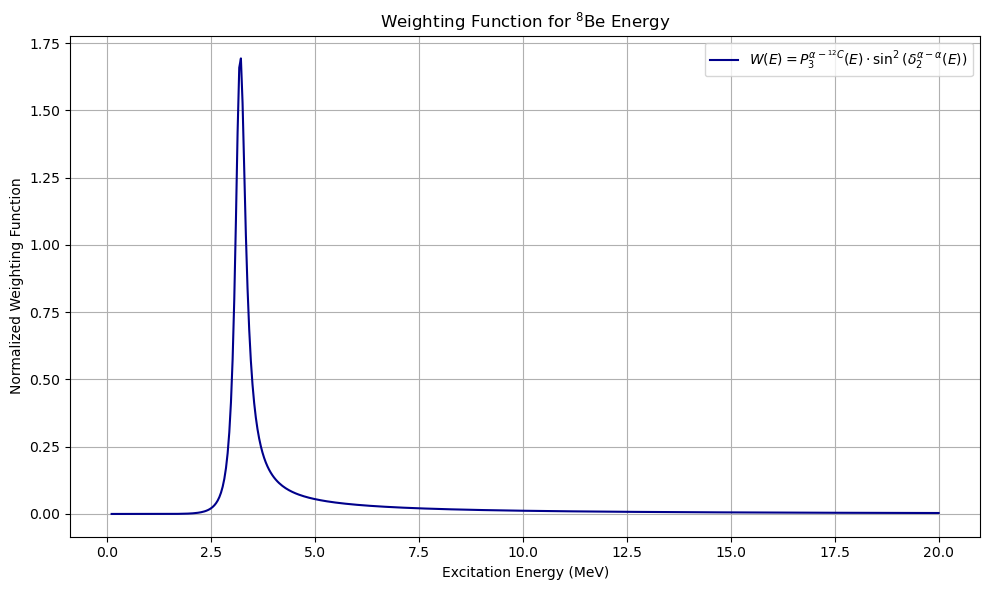

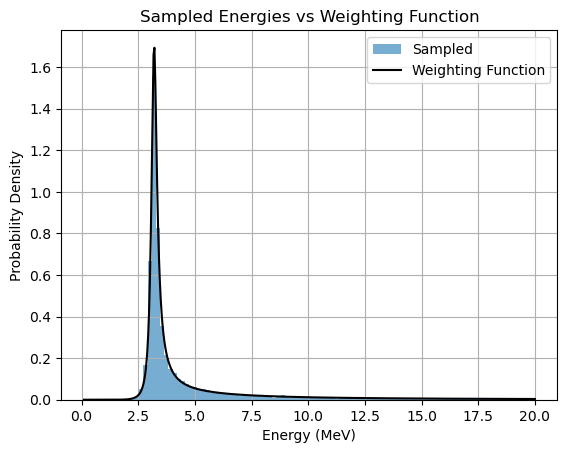

In [4]:
# Compute and plot
energies, W_E = compute_weighting_function_Be8(500)

plt.figure(figsize=(10, 6))
plt.plot(energies, W_E, label=r'$W(E) = P_3^{\alpha-^{12}C}(E) \cdot \sin^2(\delta_2^{\alpha-\alpha}(E))$', color='darkblue')
plt.xlabel('Excitation Energy (MeV)')
plt.ylabel('Normalized Weighting Function')
plt.title('Weighting Function for $^8$Be Energy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

samples = sample_weighted_energy(energies, W_E, 10000)

import matplotlib.pyplot as plt
plt.hist(samples, bins=100, density=True, alpha=0.6, label='Sampled')
plt.plot(energies, W_E, 'k-', label='Weighting Function')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability Density')
plt.title('Sampled Energies vs Weighting Function')
plt.legend()
plt.grid(True)
plt.show()


<>:89: SyntaxWarning: invalid escape sequence '\d'
<>:89: SyntaxWarning: invalid escape sequence '\d'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2745/1186320120.py:89: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')


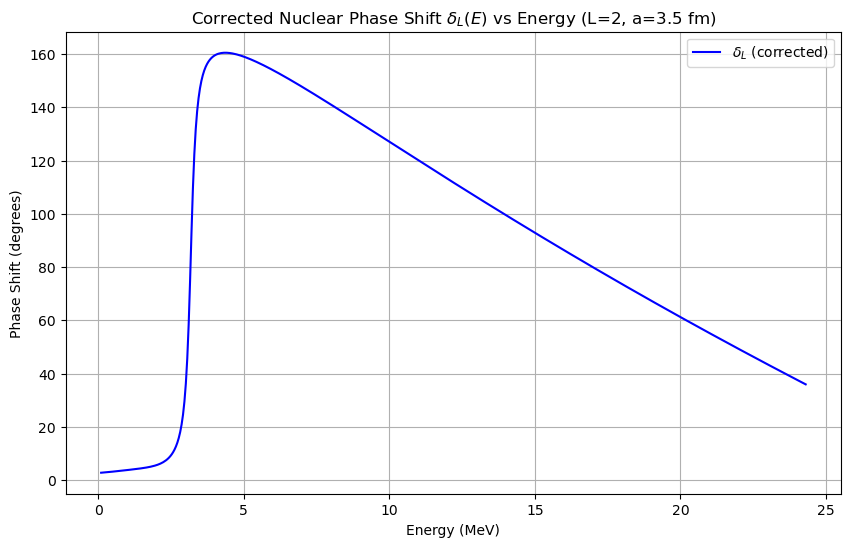

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set mpmath precision
mpmath.mp.dps = 15

# Constants
hbar_c = 197.327  # MeV·fm
e_squared = 1.4399764  # MeV·fm
Z_alpha = 2
Z_C12 = 4

m_alpha = 3727.379378  # MeV/c^2
m_C12 = 11177.929      # MeV/c^2 

mu_alpha_alpha = m_alpha / 2
mu_alpha_C12 = (m_alpha * m_C12) / (m_alpha + m_C12)

a_alpha_alpha = 3.5  # fm (channel radius)
a_alpha_C12 = 5.5 # fm
L_d = 2  # d-wave
L_f = 3 # f-wave

# Resonance parameters
E_r = 3.18  # MeV (resonance energy)
gamma2 = 3.36  # MeV (reduced width)

# Energy range
energies = np.linspace(0.1, 24.3, 500)

# Arrays to store
delta_Ld = []
phi_Ld = []
P_Ld_list = []
P_Lf_list = []

# Loop over energies
for E in energies:
    k_alpha_alpha = np.sqrt(2 * mu_alpha_alpha * E) / hbar_c
    eta_alpha_alpha = Z_alpha * Z_alpha * e_squared * mu_alpha_alpha / (hbar_c**2 * k_alpha_alpha)
    kr_alpha_alpha = k_alpha_alpha * a_alpha_alpha

    k_alpha_C12 = np.sqrt(2 * mu_alpha_alpha * E) / hbar_c
    eta_alpha_C12 = Z_alpha * Z_C12 * e_squared * mu_alpha_C12 / (hbar_c**2 * k_alpha_C12)
    kr_alpha_C12 = k_alpha_C12 * a_alpha_C12

    # Coulomb wavefunctions
    F_Ld = float(mpmath.coulombf(L_d, eta_alpha_alpha, kr_alpha_alpha, derivative=False))
    G_Ld = float(mpmath.coulombg(L_d, eta_alpha_alpha, kr_alpha_alpha, derivative=False))

    F_Lf = float(mpmath.coulombf(L_f, eta_alpha_C12, kr_alpha_C12, derivative=False))
    G_Lf = float(mpmath.coulombg(L_f, eta_alpha_C12, kr_alpha_C12, derivative=False))

    # Hard-sphere Coulomb phase shift Phi_L
    phi = np.arctan2(F_Ld, G_Ld)
    phi_Ld.append(phi)

    # Penetrability
    P_Ld = (kr_alpha_alpha) / (F_Ld**2 + G_Ld**2)
    P_Ld_list.append(P_Ld)

    P_Lf = (kr_alpha_C12) / (F_Lf**2 + G_Lf**2)
    P_Lf_list.append(P_Lf)

    # Width and shift correction
    Gamma_E = 0.3 #2 * P_Ld * gamma2

    # Correct phase shift calculation with arctan2
    numerator = 0.5 * Gamma_E
    denominator = E_r - E
    delta = -phi + np.arctan2(numerator, denominator)
    delta_Ld.append(delta)

# Convert to arrays
delta_Ld = np.array(delta_Ld)
phi_Ld = np.array(phi_Ld)
P_Ld_array = np.array(P_Ld_list)
P_Lf_array = np.array(P_Lf_list)

# Convert phase shift to degrees
delta_L_deg = np.degrees(delta_Ld)

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(energies, delta_L_deg, label=r'$\delta_L$ (corrected)', color='blue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()
